In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import Pipeline


## 1) Load the data

Load `student-mat.csv` into students_score. Data is then split into predictors(`X`) and response variable (`Y`) list.


In [2]:
students_score=pd.read_csv("student-mat.csv",sep=";")
students_score

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
X = students_score.drop(['G3',"traveltime","reason"], axis=1) #removed traveltime and reason as it is not really related to the scores obtained
Y = students_score['G3']
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (395, 30)
Y shape: (395,)


## 2) Preprocessing

- **One-Hot Encode** categorical variables.
- **Standardise** numeric variables.


In [4]:
#Convert categorical variables to logical (1/0s) using One-Hot Encoding

X = pd.get_dummies(X, drop_first=True)

print("X features after one-hot encoding:")
print(X.head())

X features after one-hot encoding:
   age  Medu  Fedu  studytime  failures  famrel  freetime  goout  Dalc  Walc  \
0   18     4     4          2         0       4         3      4     1     1   
1   17     1     1          2         0       5         3      3     1     1   
2   15     1     1          2         3       4         3      2     2     3   
3   15     4     2          3         0       3         2      2     1     1   
4   16     3     3          2         0       4         3      2     1     2   

   ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0  ...             True           False           True       False     False   
1  ...            False           False          False        True     False   
2  ...             True           False           True       False      True   
3  ...             True           False          False        True      True   
4  ...            False           False          False        True      True   

   

In [5]:
#Standardise numerical features
X_numerical = X.select_dtypes(include=['int64', 'float64'])
X_numerical_scaled = (X_numerical - X_numerical.mean()) / X_numerical.std()
X_categorical=X.select_dtypes(exclude=['int64', 'float64'])
X = pd.concat([X_numerical_scaled, X_categorical], axis=1)

## 3) Training and Test Split


In [6]:
#Split the data (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

##4.1)Train Linear Regression Model

Use training dataset to create a linear regression model. Use coefficient to interpret how the predictors affect the student's final score.

In [7]:
# Initialize and train the Multi Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Output the learned coefficients
print("\nLearned Model Parameters:")
#zip() is to combine the columns in X and the coefficient in one tuple.
# model.coef_ is an array of coefficients, one for each column in X_train
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Learned Model Parameters:
age: -0.16
Medu: 0.10
Fedu: -0.20
studytime: -0.02
failures: -0.25
famrel: 0.29
freetime: 0.01
goout: 0.18
Dalc: -0.12
Walc: 0.08
health: 0.07
absences: 0.40
G1: 0.70
G2: 3.59
school_MS: 0.19
sex_M: 0.29
address_U: -0.02
famsize_LE3: -0.01
Pstatus_T: -0.07
Mjob_health: -0.42
Mjob_other: -0.31
Mjob_services: -0.07
Mjob_teacher: -0.01
Fjob_health: 0.61
Fjob_other: 0.27
Fjob_services: -0.20
Fjob_teacher: 0.06
guardian_mother: 0.16
guardian_other: -0.17
schoolsup_yes: 0.76
famsup_yes: 0.17
paid_yes: 0.03
activities_yes: -0.54
nursery_yes: -0.25
higher_yes: 0.19
internet_yes: -0.17
romantic_yes: -0.40
Intercept: 10.56


In [8]:
coefficients = model.coef_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:")
print(importance_df)
# G2,schoolsup_yes,G1 are the top 3 factors that affects the final (G3) score positively.


Feature Importance:
            Feature  Coefficient
13               G2     3.593059
29    schoolsup_yes     0.760190
12               G1     0.700063
23      Fjob_health     0.614410
11         absences     0.398483
15            sex_M     0.294911
5            famrel     0.287094
24       Fjob_other     0.268547
14        school_MS     0.192555
34       higher_yes     0.188387
7             goout     0.181431
30       famsup_yes     0.174894
27  guardian_mother     0.164630
1              Medu     0.103758
9              Walc     0.082146
10           health     0.073408
26     Fjob_teacher     0.056192
31         paid_yes     0.033605
6          freetime     0.014466
17      famsize_LE3    -0.005873
22     Mjob_teacher    -0.014685
16        address_U    -0.022046
3         studytime    -0.024666
18        Pstatus_T    -0.065526
21    Mjob_services    -0.068380
8              Dalc    -0.121257
0               age    -0.163782
35     internet_yes    -0.165396
28   guardian_other   

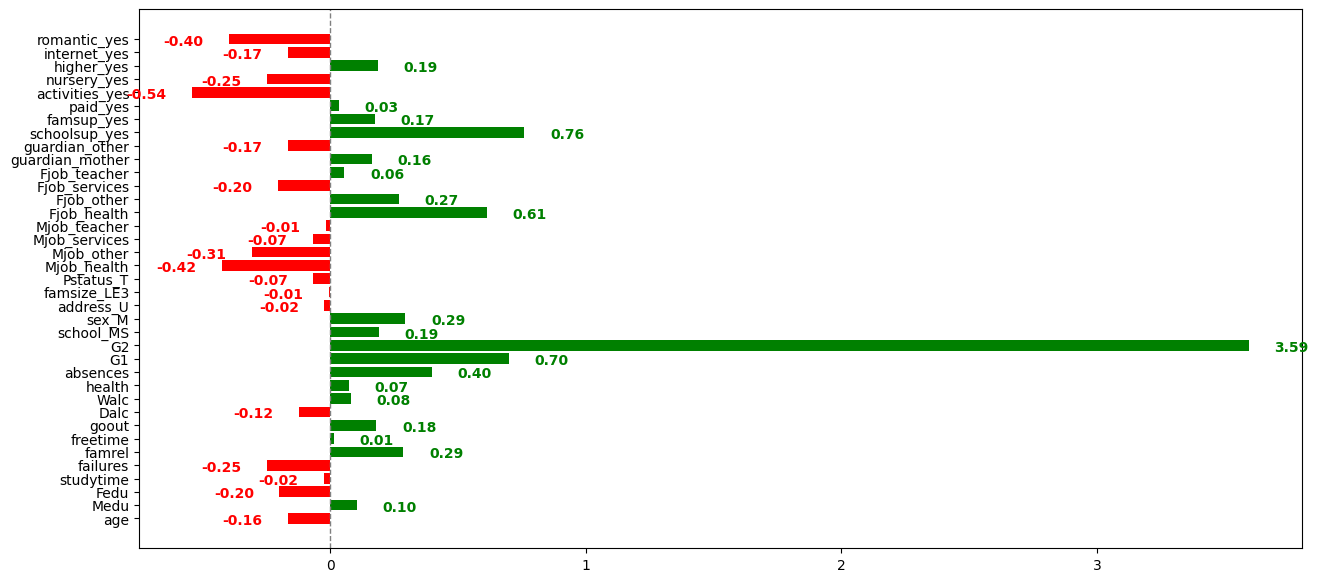

In [9]:
plt.figure(figsize=(15, 7))
# Use 'barh' for a horizontal bar chart
bars=plt.barh(feature_names,
    coefficients,
    # Color bars based on positive/negative direction
    color=['green' if c > 0 else 'red' for c in coefficients]
)

# Add a vertical line at 0 for easy reference
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

for bar in bars:
    width = bar.get_width() # The coefficient value
    label_x_pos = width + (0.1 if width > 0 else -0.1) # Position label slightly outside the bar

    # Determine alignment and color based on the bar direction (positive/negative)
    ha = 'left' if width > 0 else 'right'
    color = 'green' if width > 0 else 'red'

    plt.text(
        label_x_pos,
        bar.get_y() + bar.get_height()/3, # Center the text vertically
        f'{width:.2f}', # Format the value to two decimal places
        ha=ha, # Horizontal alignment
        va='center', # Vertical alignment
        color=color,
        fontsize=10,
        fontweight='bold'
    )

##4.2) Evaluation of Linear Regression Model

Use metrics like R squared and Mean Squared Error to evaluate the model. Perform 5-fold cross validation to estimate test error of model.

In [10]:
#function to evaluate the models
def evaluate(model, X_tr, y_tr, X_te, y_te):
    yhat_tr = model.predict(X_tr)
    yhat_te = model.predict(X_te)
    return {
        "train_mse": mean_squared_error(y_tr, yhat_tr),
        "train_r2": r2_score(y_tr, yhat_tr),
        "test_mse": mean_squared_error(y_te, yhat_te),
        "test_r2": r2_score(y_te, yhat_te)
    }

In [11]:
linreg_metrics = evaluate(model, X_train, Y_train, X_test, Y_test)
linreg_metrics

{'train_mse': 2.8998073757194534,
 'train_r2': 0.8619436264957772,
 'test_mse': 5.257702685245726,
 'test_r2': 0.7435898285670415}

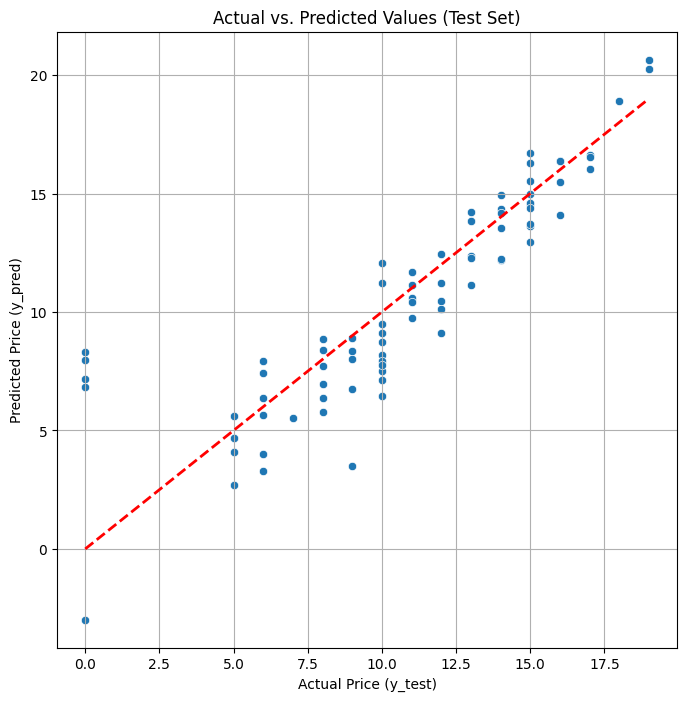

In [12]:
#scatter plot between actual and predicted
Y_pred=model.predict(X_test)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=Y_test, y=Y_pred)

# Add a diagonal line for perfect prediction (y = x)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         '--r', linewidth=2)

plt.title('Actual vs. Predicted Values (Test Set)')
plt.xlabel('Actual Price (y_test)')
plt.ylabel('Predicted Price (y_pred)')
plt.grid(True)
plt.show()

In [13]:
#Implementation of 5 fold cross validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    estimator=model,        # The model to evaluate
    X=X_train,                    # The features (training dataset)
    y=Y_train,                    # The target(training dataset)
    scoring='neg_mean_squared_error', # The metric
    cv=k_folds              # The cross-validation splitting strategy
  )
mse_scores = -scores
print("\n--- Summary of 5-Fold Results ---")
print("Average Cross-Validation MSE:",float(mse_scores.mean()))
#Using 5 fold cross validation, MSE is lower than the model with one test model.

#The primary role of cross-validation (CV) in model evaluation is to provide a robust and reliable estimate
#of the model's performance on unseen data.
#It achieves this by repeatedly splitting the dataset into different training and testing subsets, ensuring that the model's
#performance score is not biased toward a single, arbitrary data split.


--- Summary of 5-Fold Results ---
Average Cross-Validation MSE: 4.142352000120717


##5)Ridge Regression Model

To penalise the model for being too complex, we perform ridge regression model. Use 5-fold cross validation to estimate test error.

In [14]:
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, Y_train)


ridge_metrics = evaluate(ridge, X_train, Y_train, X_test, Y_test)
ridge_metrics

{'train_mse': 2.900472679036625,
 'train_r2': 0.8619119521976778,
 'test_mse': 5.230603545050567,
 'test_r2': 0.7449114124600649}

In [15]:
#5-fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_scores(pipeline):
    mse = -cross_val_score(pipeline, X_train, Y_train, scoring="neg_mean_squared_error", cv=cv)
    r2 = cross_val_score(pipeline, X_train, Y_train, scoring="r2", cv=cv)
    return mse, r2

ridge_cv_mse, ridge_cv_r2 = cv_scores(ridge)

{
    "ridge_cv_mse_mean": ridge_cv_mse.mean(),
    "ridge_cv_r2_mean": ridge_cv_r2.mean()
    }

{'ridge_cv_mse_mean': np.float64(4.050392112945099),
 'ridge_cv_r2_mean': np.float64(0.8044371703467796)}

## 6) Ridge α Sweep with Cross-Validation

In [16]:
alpha_grid = np.logspace(-3, 3, 13)
ridge_cv_mse_by_alpha = []
ridge_cv_r2_by_alpha = []

for a in alpha_grid:
    ridge_a =  Ridge(alpha=a, random_state=42)
    mse, r2s = cv_scores(ridge_a)
    ridge_cv_mse_by_alpha.append(mse.mean())
    ridge_cv_r2_by_alpha.append(r2s.mean())

best_idx = int(np.argmin(ridge_cv_mse_by_alpha))
best_alpha = float(alpha_grid[best_idx])
best_alpha, ridge_cv_mse_by_alpha[best_idx], ridge_cv_r2_by_alpha[best_idx]

(10.0, np.float64(3.7996845332835223), np.float64(0.8156095339970333))

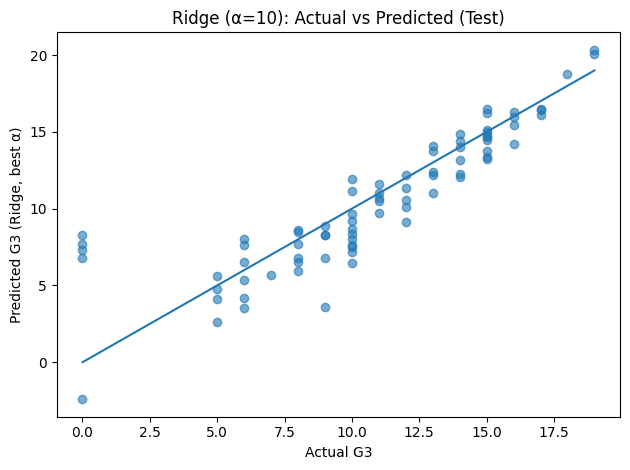

In [17]:
# Predicted vs Actual (Test) - Ridge (best α)
ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(X_train, Y_train)
yhat_ridge = ridge_best.predict(X_test)

plt.figure()
plt.scatter(Y_test, yhat_ridge, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3 (Ridge, best α)")
plt.title(f"Ridge (α={best_alpha:.3g}): Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()

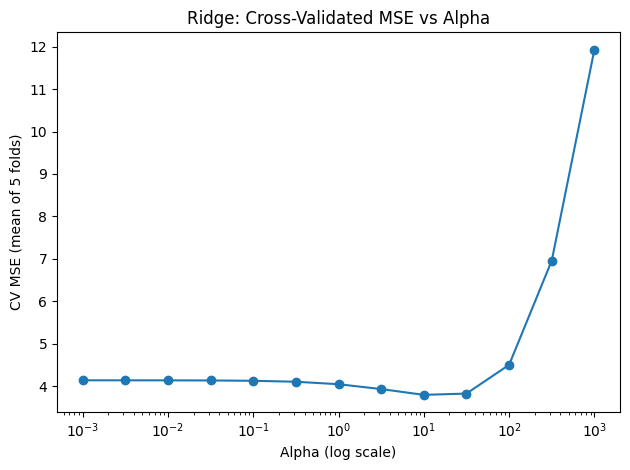

In [18]:
# CV MSE vs α
plt.figure()
plt.semilogx(alpha_grid, ridge_cv_mse_by_alpha, marker="o")
plt.xlabel("Alpha (log scale)")
plt.ylabel("CV MSE (mean of 5 folds)")
plt.title("Ridge: Cross-Validated MSE vs Alpha")
plt.tight_layout()
plt.show()

##7) Comparision between linear and ridge regression model
Test Mean Squared Error for ridge regression is smaller than that of linear regression. Test R squared for ridge regression is larger thatn that of linear regression. This shows that ridge regression did help to improve the model's prediction.

In [19]:
print("Linear Regression Metrics",linreg_metrics)
print("Ridge Regression Metrics",ridge_metrics)

Linear Regression Metrics {'train_mse': 2.8998073757194534, 'train_r2': 0.8619436264957772, 'test_mse': 5.257702685245726, 'test_r2': 0.7435898285670415}
Ridge Regression Metrics {'train_mse': 2.900472679036625, 'train_r2': 0.8619119521976778, 'test_mse': 5.230603545050567, 'test_r2': 0.7449114124600649}
